In [68]:
# Enable auto-complete for notebook
%config IPCompleter.greedy=True

# Show plots directly in the notebook
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm # for training a linear regression model.
import matplotlib.pyplot as plt
import seaborn as sns # For making correlation matrices

# 1 - Prepare Data

In [44]:
# Read in results
df = pd.read_csv('combinedResults.csv', sep=';')

In [45]:
df.head(5)

,chartNumber,column,columnSize,correctColumn,correctColumnSize,duration,Participant
0,0,1,10,1,11,132.629580,participant1
1,21,3,25,3,31,32.749995,participant1
2,4,2,52,2,52,20.776342,participant1
3,18,1,12,1,10,35.804036,participant1
4,6,0,38,0,37,12.049216,participant1


In [46]:
# Dictionary containing {chartNumber: number of columns}
numberOfColumns = {1:3, 2:3, 3:3, 4:3, 5:3, 6:3, 7:3, 8:3, 
                   9:5, 10:5, 11:5, 12:5, 13:5, 14:5, 15:5, 16:5,
                   17:8, 18:8, 19:8, 20:8 , 21:8, 22:8, 23:8, 24:8,
                   0:5}

In [47]:
df["numberOfColumns"] = [numberOfColumns[i] for i in df["chartNumber"].tolist()]

In [48]:
df.head(5)

,chartNumber,column,columnSize,correctColumn,correctColumnSize,duration,Participant,numberOfColumns
0,0,1,10,1,11,132.629580,participant1,5
1,21,3,25,3,31,32.749995,participant1,8
2,4,2,52,2,52,20.776342,participant1,3
3,18,1,12,1,10,35.804036,participant1,8
4,6,0,38,0,37,12.049216,participant1,3


In [49]:
# Create dummy which is False (0) if participant got column correct, and True (1) if they got it wrong.
df["relativeEstimateDummy"] = (df["column"] != df["correctColumn"])

In [50]:
# Get absolute error of estimate
df["estimateError"] = abs(df["columnSize"] - df["correctColumnSize"])

In [51]:
# Get dummy for orientation. 1 = column chart, 0 = bar chart
df["orientation"] = df["chartNumber"] % 2

In [52]:
df = df.drop(0)

In [53]:
df.head(5)

,chartNumber,column,columnSize,correctColumn,correctColumnSize,duration,Participant,numberOfColumns,relativeEstimateDummy,estimateError,orientation
1,21,3,25,3,31,32.749995,participant1,8,False,6,1
2,4,2,52,2,52,20.776342,participant1,3,False,0,0
3,18,1,12,1,10,35.804036,participant1,8,False,2,0
4,6,0,38,0,37,12.049216,participant1,3,False,1,0
5,17,1,9,1,10,20.745094,participant1,8,False,1,1


# 2 - Initial Findings

In [73]:
df[["columnSize", "correctColumnSize", "estimateError", "duration"]].describe().T

,count,mean,std,min,25%,50%,75%,max
columnSize,124.0,33.403226,20.022312,9.000000,18.000000,30.000000,42.250000,85.000000
correctColumnSize,124.0,33.338710,20.638541,10.000000,15.000000,29.000000,42.000000,85.000000
estimateError,124.0,1.241935,1.505389,0.000000,0.000000,1.000000,2.000000,9.000000
duration,124.0,17.768280,13.944773,7.435744,11.348882,13.934205,18.815863,107.399023


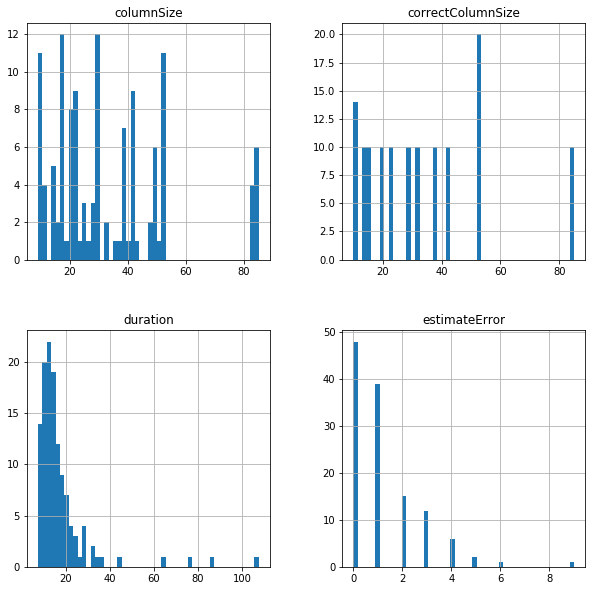

In [74]:
# Plot a histogram of duration.
df[["columnSize", "correctColumnSize", "estimateError", "duration"]].hist(figsize=(15,10), bins=50)
plt.show()

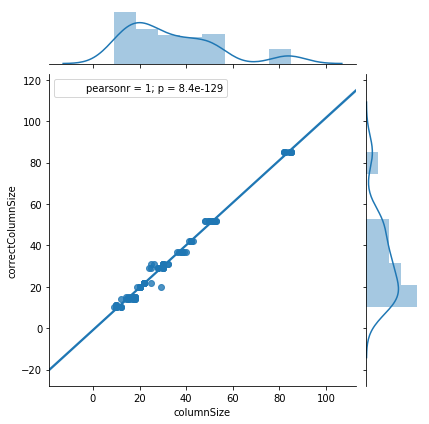

In [101]:
# Actual column size vs participant's estimates
sns.jointplot("columnSize", "correctColumnSize", data=df, kind="reg")

plt.show()

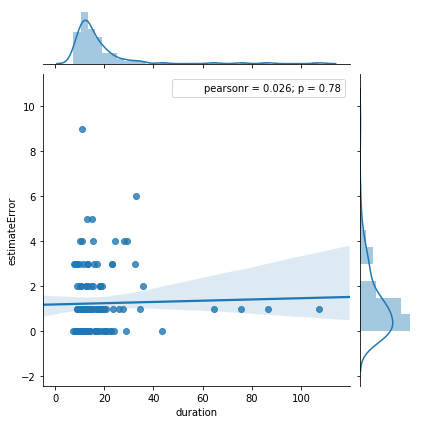

In [102]:
# Actual duration vs estimate error
sns.jointplot("duration", "estimateError", data=df, kind="reg")

plt.show()

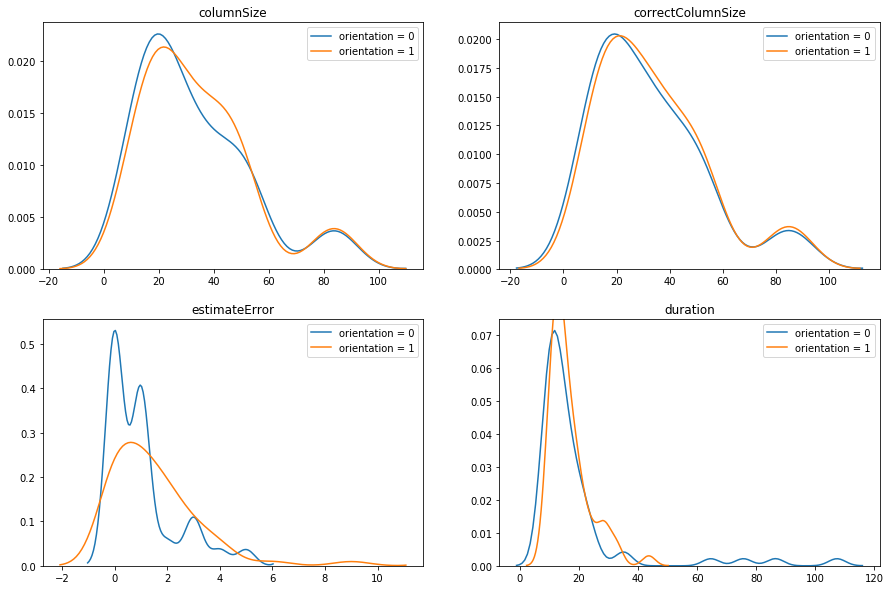

In [83]:
# Plots of disributions of the continuous variables where churn is either 0 or 1.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes_list = [item for sublist in axes for item in sublist]

x = ["columnSize", "correctColumnSize", "estimateError", "duration"]

for feature in x:
    ax = axes_list.pop(0)

    sns.distplot(df[df['orientation'] == False][[feature]], hist=False, ax=ax, label="orientation = 0")
    sns.distplot(df[df['orientation'] == True][[feature]], hist=False, ax=ax, label="orientation = 1")
        
    ax.set_title(feature)

for ax in axes_list:
    ax.remove()     
    
plt.show()

# 3 - Run Models

In [103]:
# Regress explanatory variables on duraction
linearModel = sm.ols(formula="duration ~ orientation + chartNumber + Participant + numberOfColumns", data=df).fit()
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     10.95
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.48e-10
Time:                        18:58:46   Log-Likelihood:                -470.75
No. Observations:                 124   AIC:                             957.5
Df Residuals:                     116   BIC:                             980.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [111]:
# Regress explanatory variables on estimateError
linearModel = sm.ols(formula="estimateError ~ orientation + duration + chartNumber + Participant + numberOfColumns", data=df).fit()
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:          estimateError   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.056
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00372
Time:                        19:06:22   Log-Likelihood:                -214.22
No. Observations:                 124   AIC:                             446.4
Df Residuals:                     115   BIC:                             471.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         